# Latar Belakang


Administrasi Keamanan Transportasi (TSA) merupakan sebuah organisasi untuk melindungi sistem transportasi negara (US) untuk memastikan kebebasan bergerak bagi orang dan perdagangan. Perusahaan ini menerima pengusutan atas kelalaian petugas selama proses pemeriksaan. Banyak orang yang mengusut klaim terhadap perusahaan atas situasi yang telah dialami. Pengusutan klaim yang berlebih akan menimbulkan biaya ganti rugi yang besar.

# Rumusan Masalah


Untuk mengatasi masalah biaya yang berlebih akibat pengusutan klaim yang terlalu banyak, perusahaan ingin mengatasi masalah tersebut dengan melihat pengusutan klaim apa yang paling sering terjadi dan memakan biaya yang besar. keputusan ini dapat membantu perusahaan untuk mengurangi biaya ganti rugi serta meminimalisir kejadian yang tidak diinginkan.


sebagai data analyst, hal yang perlu dijawab adalah: <br>
<b> Karakteristik klaim apa yang paling sering terjadi, terutama klaim yang mengusut ganti rugi dengan jumlah besar

# Data

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

from scipy.stats import normaltest

import re
import math

pd.set_option("display.max_columns",None)

Data ini merupakan data seluruh klaim terhadap TSA atas kejadian yang menimpa pengusut. Data ini menjelaskan detil kejadian (waktu, lokasi, item), waktu pengajuan klaim, dan biaya ganti rugi. Data ini memiliki 13 variabel, antara lain: <br>

1. `Claim Number` : identifier untuk setiap klaim
1. `Date Received` : tanggal klaim diajukan
1. `Incident Date` : tanggal kejadian/insiden terjadi
1. `Airport Code` : Kode Bandara
1. `Airport Name` : Nama Bandara
1. `Airline Name` : Nama Pesawat
1. `Claim Type` : Jenis Klaim yang diajukan
1. `Claim Site` : Lokasi kejadian klaim
1. `Item` : jenis barang yang di klaim
1. `Claim Amount` : Biaya ganti rugi (dolar)
1. `Status` : status klaim
1. `Close Amount` : biaya ganti rugi (dolar) dari penyelesaian
1. `Disposition` : penyelesaian akhir klaim


# Data Understanding

In [169]:
df = pd.read_csv('tsa_claims.csv',na_values="-")
df

C:\Users\asus\AppData\Local\Temp\ipykernel_5488\2712230659.py:1: DtypeWarning: Columns (0,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tsa_claims.csv',na_values="-")


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,20-Nov-15,16-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other; Clothing,NaN,NaN,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Audio/Video; Home Decor,NaN,NaN,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing,NaN,NaN,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,NaN,NaN,NaN


In [170]:
pd.set_option('display.max_colwidth', -1)

# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)

# display dataset info dan unique value dari setiap variabel
display(df.info(), tabel1Desc)

C:\Users\asus\AppData\Local\Temp\ipykernel_5488\1241656058.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195302 non-null  object
 4   Airport Name   195302 non-null  object
 5   Airline Name   165646 non-null  object
 6   Claim Type     196072 non-null  object
 7   Claim Site     203251 non-null  object
 8   Item           195878 non-null  object
 9   Claim Amount   187472 non-null  object
 10  Status         191510 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


None

Column Name  Number of Unique  \
0   Claim Number   204258             
1   Date Received  4007               
2   Incident Date  26807              
3   Airport Code   464                
4   Airport Name   484                
5   Airline Name   317                
6   Claim Type     10                 
7   Claim Site     5                  
8   Item           4703               
9   Claim Amount   36116              
10  Status         14                 
11  Close Amount   17162              
12  Disposition    3                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

Secara umum, kita dapat mengetahui bahwa:

1. Dataset memiliki sebanyak 204267 rows dan 13 columns.
1. mayoritas jenis variabel pada dataset ini adalah categorical
1. Tidak semua kolom terisi full (terdapat <i>missing value </i>)
1. Format tanggal tidak selaras antara kolom `incident date` dan `Date Received`
1. Dari deskripsi kolom, seharusnya kolom `Claim Amount` dan `Close Amount` berisi data numerical
1. Terdapat salah ketik pada kolom `Claim Amount` dan `Close Amount`, jumlah dolar seharusnya tidak mungkin ada titik koma (;), contoh : "$3;250.00"
1. Terdapat records yang tidak valid, dimana tanggal insiden (`incident date`) terjadi setelah tgl pengajuan klaim (`Date Received`)
1. Pada kolom `status`, terdapat ketidakselarasan value yaitu "Denied" dengan "Deny", "Settled" dan "Settle", dst.

mari kita ubah terlebih dahulu isi dari kolom `Claim Amount` dan `Close Amount` menjadi nilai numerik

In [171]:
# note : Try dan except digunakan karena untuk meng-skip nilai NaN supaya tidak error

def claim_to_float(x):
    try:
        num = ''.join(re.findall(r'(\d+(?:\.\d+)*)', x['Claim Amount']))
        return(float(num))
    except:
        return x['Claim Amount']

def close_to_float(x):
    try:
        num = ''.join(re.findall(r'(\d+(?:\.\d+)*)', x['Close Amount']))
        return(float(num))
    except:
        return x['Close Amount']

In [172]:
# mengubah isi dari kolom Claim Amount dan Close amount yang berupa string menjadi float

df['Claim Amount'] = df.apply(claim_to_float,axis=1)
df['Close Amount'] = df.apply(close_to_float,axis=1)
df[['Claim Amount','Close Amount']]

,Claim Amount,Close Amount
0,350.00,350.00
1,100.00,50.00
2,278.88,227.92
3,50.00,50.00
4,84.79,84.79
...,...,...
204262,NaN,NaN
204263,NaN,NaN
204264,NaN,NaN
204265,NaN,NaN


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Claim Number   204267 non-null  object 
 1   Date Received  204004 non-null  object 
 2   Incident Date  202084 non-null  object 
 3   Airport Code   195302 non-null  object 
 4   Airport Name   195302 non-null  object 
 5   Airline Name   165646 non-null  object 
 6   Claim Type     196072 non-null  object 
 7   Claim Site     203251 non-null  object 
 8   Item           195878 non-null  object 
 9   Claim Amount   187472 non-null  float64
 10  Status         191510 non-null  object 
 11  Close Amount   135315 non-null  float64
 12  Disposition    131359 non-null  object 
dtypes: float64(2), object(11)
memory usage: 20.3+ MB


## Deskriptive Statistik

### Summary

In [174]:
display(df.drop(['Claim Number'],axis=1).describe())
display(df.drop(['Claim Number'],axis=1).describe(include='object'))

,Claim Amount,Close Amount
count,1.874720e+05,135315.000000
mean,1.609638e+07,98.293415
std,6.928745e+09,925.832118
min,0.000000e+00,0.000000
25%,2.665000e+01,0.000000
50%,1.150000e+02,0.000000
75%,3.500000e+02,70.000000
max,3.000000e+12,250000.000000


,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Status,Disposition
count,204004,202084,195302,195302,165646,196072,203251,195878,191510,131359
unique,4007,26807,464,484,317,10,5,4703,14,3
top,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,Denied,Deny
freq,682,144,9596,9232,17553,117868,159753,36908,68339,68382


dari deskriptive summary diatas, terlihat bahwa maksimal claimant meminta ganti rugi adalah 3.000000e+12, dimana hal ini sepertinya terlalu berlebihan untuk ganti rugi

### Normality Test for Claim Amount & Close Amount

Uji distribusi normal dilakukan untuk menentukan metode apa yang dijadikan handling missing value nantinya

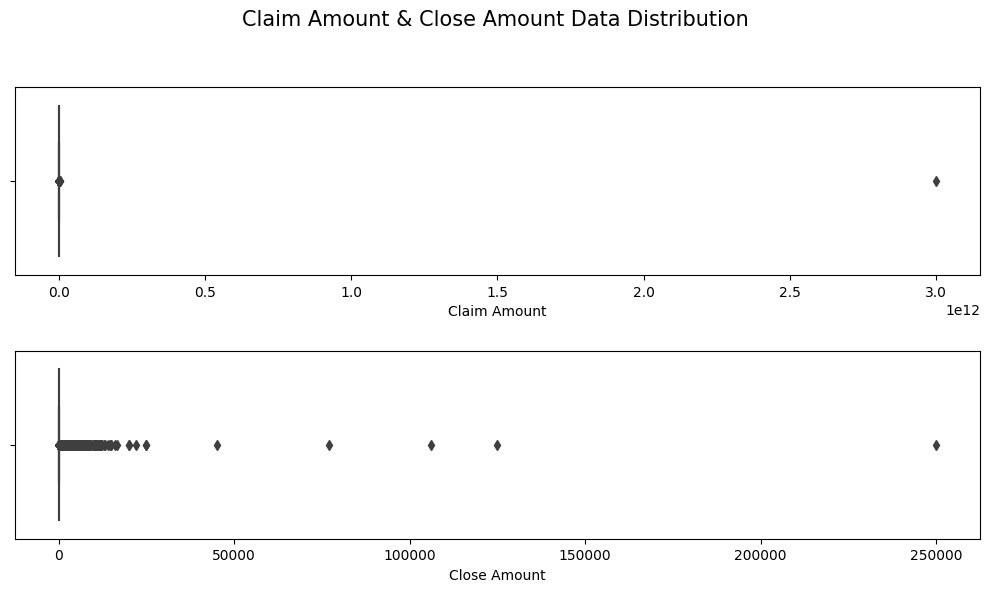

In [175]:
fig, ax = plt.subplots(2,1, figsize = (10,6), sharey=True)
sns.boxplot(ax=ax[0],data=df, x='Claim Amount')
sns.boxplot(ax=ax[1],x=df['Close Amount'])
plt.tight_layout()
fig.subplots_adjust(hspace=0.4, top=0.85)

# Add the main title
fig.suptitle("Claim Amount & Close Amount Data Distribution", fontsize=15)
plt.show()

Dari hasil visualisasi diatas, dapat diketahui bahwa data Claim Amount memiliki outlier yang sangat tinggi sehingga mempengaruhi ticks dari X Label, mari kita filter data point tersebut.

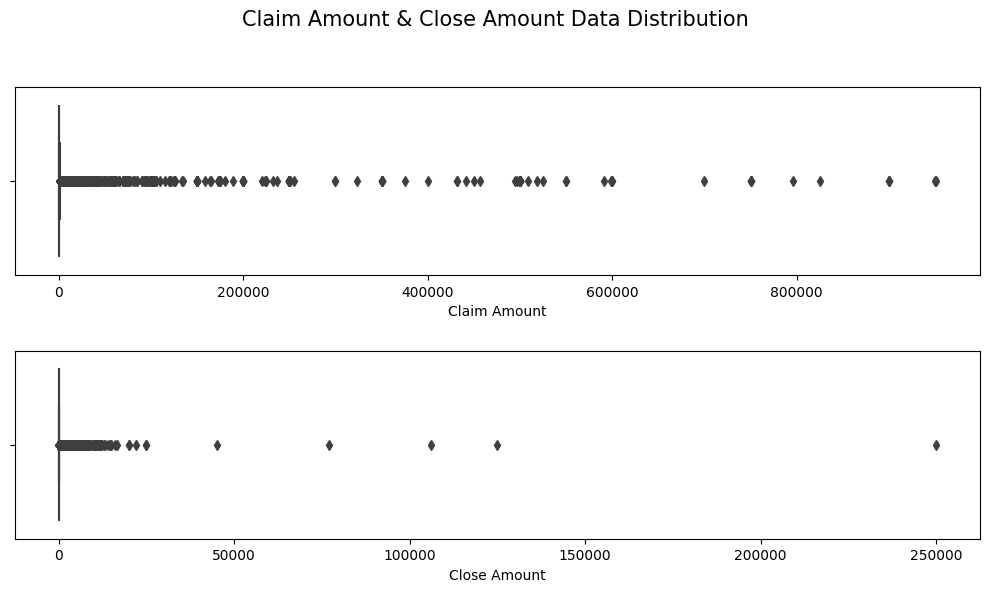

In [176]:
fig, ax = plt.subplots(2,1, figsize = (10,6), sharey=True)

# hanya ambil data point dibawah 1000000, karena claim yang masuk akal itu dibawah 1jt dolar, (menurut saya)
sns.boxplot(ax=ax[0],data=df[df['Claim Amount'] < 1000000], x='Claim Amount')

sns.boxplot(ax=ax[1],data=df, x='Close Amount')
plt.tight_layout()
fig.subplots_adjust(hspace=0.4, top=0.85)

# Add the main title
fig.suptitle("Claim Amount & Close Amount Data Distribution", fontsize=15)
plt.show()

Kesimpulannya bahwa kedua variabel tsb tidak terdistribusi secara normal melainkan Right Skewed secara visualisasi. Sekarang mari kita cek secara statistika

In [177]:
# Uji normalitas menggunakan metode D'Agostino

normaltest(df['Claim Amount'].dropna())

NormaltestResult(statistic=1131407.136147484, pvalue=0.0)

In [178]:
# Uji normalitas menggunakan metode D'Agostino

normaltest(df['Close Amount'].dropna())

NormaltestResult(statistic=643280.7525090653, pvalue=0.0)

Kedua uji test menghasilkan nilai P-Value < 0.05, sehingga dapat disimpulkan bahwa variabel `Claim Amount` dan `Close Amount` tidak terdistribusi normal

### Central Tendency

In [179]:
print("Central Tendency of Claim Amount :")
print(f"Median = {df['Claim Amount'].median()}")
print("Central Tendency of Close Amount :")
print(f"Mean = {df['Close Amount'].mean()}")

Central Tendency of Claim Amount :
Median = 115.0
Central Tendency of Close Amount :
Mean = 98.29341543805195


In [180]:
for x in df.drop(['Claim Number','Claim Amount','Close Amount'],axis=1).columns:
    print(df[x].mode())

0    5-Dec-03
Name: Date Received, dtype: object
0    12/27/2004 0:00
Name: Incident Date, dtype: object
0    LAX
Name: Airport Code, dtype: object
0    John F. Kennedy International
Name: Airport Name, dtype: object
0    American Airlines
Name: Airline Name, dtype: object
0    Passenger Property Loss
Name: Claim Type, dtype: object
0    Checked Baggage
Name: Claim Site, dtype: object
0    Other
Name: Item, dtype: object
0    Denied
Name: Status, dtype: object
0    Deny
Name: Disposition, dtype: object


### Meassure of Spread

In [181]:
print(f"Range Claim Amount : {df['Claim Amount'].max() - df['Claim Amount'].min()}")
print(f"Range Close Amount : {df['Close Amount'].max() - df['Close Amount'].min()}")

Range Claim Amount : 3000000000000.0
Range Close Amount : 250000.0


In [182]:
print(f"std Claim Amount : {df['Claim Amount'].std()}")
print(f"std Close Amount : {df['Close Amount'].std()}")

std Claim Amount : 6928745215.165164
std Close Amount : 925.8321179099281


# Data Cleaning

Data Cleaning dilakukan untuk memberikan data yang berkualitas agar hasil analisis dinyatakan valid, proses yang dilakukan antara lain adalah handling data duplikat, handling <i>Missing value</i>, menyesuaikan tipe data, memperbaiki typo, dsb. 

In [183]:
display(df[df['Claim Number'].duplicated()])
print(f"Jumlah data yang duplikat berdasarkan Claim Number : {df[df['Claim Number'].duplicated()].shape[0]} baris")

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
16842,2004050450432,26-Sep-03,9/13/2003 0:00,NaN,NaN,NaN,Property Damage,Checked Baggage,DVD/CD Players,31.96,Canceled,NaN,NaN
186744,2013081805991,13-Jan-14,21-Dec-12,HPN,Westchester County; White Plains,USAir,Personal Injury,Checked Baggage,Audio/Video; Jewelry & Watches,0.00,Deny,NaN,NaN
186836,2013053003894,18-Apr-14,22-Apr-13,ACY,Atlantic City International,NaN,Motor Vehicle,Motor Vehicle,Baggage/Cases/Purses,2233.86,Settle,NaN,NaN
186837,2013081205863,24-Apr-14,2-Aug-13,ZZX,Non TSA Airport (motor vehicle),NaN,Personal Injury,Motor Vehicle,NaN,20000.00,Settle,NaN,NaN
186838,2013082906390,3-Jul-14,23-Jul-13,BNA,Nashville International,Southwest Airlines,Personal Injury,Checkpoint,Other,NaN,NaN,NaN,NaN
186842,2013103108490,22-May-14,26-Sep-13,ZZX,Non TSA Airport (motor vehicle),NaN,Personal Injury,Motor Vehicle,NaN,NaN,NaN,NaN,NaN
186844,2013121110011,21-Jul-14,15-May-13,JAX,Jacksonville International,NaN,Personal Injury,Checkpoint,NaN,NaN,NaN,NaN,NaN
186846,2013123010324,21-May-14,30-Nov-13,MCO,Orlando International Airport,Delta Air Lines,Personal Injury,Checkpoint,NaN,0.00,Deny,NaN,NaN
196321,2013050203487,27-Feb-15,21-Jan-13,BOS,Boston (Logan) International Airport,American Airlines,Personal Injury,Checkpoint,NaN,0.00,Deny,NaN,NaN


Jumlah data yang duplikat berdasarkan Claim Number : 9 baris


karena kolom `Claim Number` merupakan identifier setiap klaim, sehingga tidak mungkin terdapat dua `Claim Number` atau lebih dengan isi yang berbeda, untuk menghindari redundansi dan Mengingat data yang duplikat juga tidak mencapai 1% (9 baris) dari jumlah data, sebaiknya data yang duplikat dihapus saja. 

In [184]:
df.drop_duplicates('Claim Number',inplace=True)

selanjutnya, variabel tanggal perlu diselaraskan formatnya

In [185]:
df[['Date Received','Incident Date']]

,Date Received,Incident Date
0,4-Jan-02,12/12/2002 0:00
1,2-Feb-02,1/16/2004 0:00
2,4-Feb-02,11/26/2003 0:00
3,7-Feb-02,1/6/2003 0:00
4,18-Feb-02,2/5/2005 0:00
...,...,...
204262,20-Nov-15,16-Oct-15
204263,17-Dec-15,2-Dec-15
204264,22-Dec-15,20-Dec-15
204265,30-Dec-15,28-Dec-15


In [186]:
df['Date Received'] = pd.to_datetime(df['Date Received'])

In [187]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 300-09-03 00:00:00

dari hasil Error diatas, dapat dikatakan bahwa ternyata terdapat value yang typo pada kolom `Incident Date`, sehingga proses konversi gagal dilakukan, mari kita cek value mana saja yang typo dari kolom tersebut

In [188]:
idx_df = []

for idx,val in enumerate(df['Incident Date']):
    try:
        pd.to_datetime(val)
    except:
        idx_df.append(idx+1)

In [189]:
print('Jumlah :',len(df['Incident Date'].loc[idx_df]))
print(list(df['Incident Date'].loc[idx_df]))

Jumlah : 164
['03-SEP-0300 00:00', '10-OCT-0200 00:00', '05-DEC-0204 00:00', '20-MAR-0201 00:00', '25-SEP-0204 00:00', '17-MAR-0201 00:00', '21-JAN-0210 00:00', '24-JAN-0203 00:00', '20-JUN-0209 00:00', '09-DEC-0200 00:00', '17-MAY-0200 00:00', '14-JAN-0205 00:00', '15-MAY-0200 00:00', '23-DEC-0204 00:00', '25-JAN-0201 00:00', '20-MAR-0200 00:00', '04-JAN-0205 00:00', '04-NOV-0204 00:00', '10-JAN-0205 00:00', '16-JAN-0200 00:00', '17-FEB-0205 00:00', '18-JUL-0200 00:00', '25-DEC-0200 00:00', '13-JAN-0205 00:00', '17-FEB-0005 00:00', '27-FEB-0205 00:00', '23-FEB-0205 00:00', '22-DEC-0205 00:00', '19-FEB-0205 00:00', '30-JUN-0204 00:00', '01-MAR-0200 00:00', '07-MAR-0005 00:00', '23-FEB-0005 00:00', '04-MAR-0205 00:00', '15-FEB-1005 00:00', '18-MAR-0200 00:00', '12-MAR-0205 00:00', '08-APR-0200 00:00', '03-MAY-0205 00:00', '28-APR-0005 00:00', '01-MAY-0205 00:00', '01-JUL-0200 00:00', '29-JUN-0200 00:00', '15-JUN-0200 00:00', '02-JUL-0205 00:00', '01-MAY-0205 00:00', '08-AUG-0205 00:00',

terdapat 164 data yang typo, dan sumber typo tersebut berasal dari penulisan tahun yang salah seperti 0203, 0204, 0205, 0206, 0207, dst. dari base knowledge yang saya miliki, value tersebut mungkin berkorespondensi secara berturut-turut dengan nilai 2003, 2004, 2005, 2006, 2007, dst., sehingga akan direplace dengan nilai-nilai tsb. Namun ada beberapa typo yang tidak jelas seperti penulisan tahun 0300, 0200, 1008, 0005, dsb. karena penulisan tersebut tidak jelas, maka records tersebut akan dihapus.

In [190]:
# Handling Typo

for i in df['Incident Date'].loc[idx_df]:
    if i[7:11] == '0201':
        df['Incident Date'][df['Incident Date'] == i] = i.replace(i[7:11],'2001')        
    elif i[7:11] == '0202':
        df['Incident Date'][df['Incident Date'] == i] = i.replace(i[7:11],'2002')
    elif i[7:11] == '0203':
        df['Incident Date'][df['Incident Date'] == i] = i.replace(i[7:11],'2003')
    elif i[7:11] == '0204':
        df['Incident Date'][df['Incident Date'] == i] = i.replace(i[7:11],'2004')
    elif i[7:11] == '0205':
        df['Incident Date'][df['Incident Date'] == i] = i.replace(i[7:11],'2005')
    elif i[7:11] == '0206':
        df['Incident Date'][df['Incident Date'] == i] = i.replace(i[7:11],'2006')
    elif i[7:11] == '0207':
        df['Incident Date'][df['Incident Date'] == i] = i.replace(i[7:11],'2007')
    elif i[7:11] == '0208':
        df['Incident Date'][df['Incident Date'] == i] = i.replace(i[7:11],'2008')
    elif i[7:11] == '0209':
        df['Incident Date'][df['Incident Date'] == i] = i.replace(i[7:11],'2009')

C:\Users\asus\AppData\Local\Temp\ipykernel_5488\3851896708.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Incident Date'][df['Incident Date'] == i] = i.replace(i[7:11],'2004')
C:\Users\asus\AppData\Local\Temp\ipykernel_5488\3851896708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Incident Date'][df['Incident Date'] == i] = i.replace(i[7:11],'2001')
C:\Users\asus\AppData\Local\Temp\ipykernel_5488\3851896708.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [191]:
# Drop rows typo yang tidak jelas

list_drop = []

for i,row in df[['Incident Date']].loc[idx_df].iterrows():
    if row[0][7:11] not in ['2001','2002','2003','2004','2005','2006','2007','2008','2009']:
        list_drop.append(i)

df.drop(index=list_drop,inplace=True)

In [192]:
# Konversi kolom Incident Date ke datetime
df['Incident Date'] = pd.to_datetime(df['Incident Date'])

# Menyamakan format kedua kolom tanggal
df['Date Received'] = df['Date Received'].dt.strftime('%Y-%m-%d')
df['Incident Date'] = df['Incident Date'].dt.strftime('%Y-%m-%d')

In [193]:
df[['Date Received','Incident Date']]

,Date Received,Incident Date
0,2002-01-04,2002-12-12
1,2002-02-02,2004-01-16
2,2002-02-04,2003-11-26
3,2002-02-07,2003-01-06
4,2002-02-18,2005-02-05
...,...,...
204262,2015-11-20,2015-10-16
204263,2015-12-17,2015-12-02
204264,2015-12-22,2015-12-20
204265,2015-12-30,2015-12-28


In [194]:
df['Date Received'] = pd.to_datetime(df['Date Received']) # If your Date column is of the type object otherwise skip this

print(f"Kurun waktu klaim mulai dari {df['Date Received'].min()} sampai {df['Date Received'].max()}")

Kurun waktu klaim mulai dari 1994-01-05 00:00:00 sampai 2055-05-17 00:00:00


Oops! ternyata terdapat date yang melebihi tahun sekarang, yaitu 2055. Karena dataset ini hanya mencatat klaim sampai 2015 saja, maka klaim diatas tahun tsb akan dihapus

In [195]:
display(df[df['Date Received'] > "2015-12-31"])
print(f"Jumlah Data yang melebihi tahun 2015 sebanyak : {df[df['Date Received'] > '2015-12-31'].shape[0]}")

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
96936,2006051105953,2020-05-08,2006-04-04,JFK,John F. Kennedy International,NaN,Property Damage,Checked Baggage,Clocks - Inexpensive ($75.00 or less); Clothing - Shoes; belts; accessories; etc.; Lighting Supplies (globe domes; electric candlesticks; candelabra; etc.); Luggage (all types including footlockers),637.76,Settled,179.08,Settle
96937,2005051985068,2025-05-17,2005-04-18,MCO,Orlando International Airport,AirTran Airlines,Property Damage,Checked Baggage,Musical Instruments - Other - Over $250,100.00,Approved,100.00,Approve in Full
96938,2005060785897,2025-05-31,2005-05-06,OAK,Metropolitan Oakland International,Southwest Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),65.00,Denied,0.00,Deny
96939,2005090792253,2025-05-31,2005-07-26,LAX,Los Angeles International Airport,NaN,Property Damage,Checked Baggage,Locks,250.00,Denied,0.00,Deny
96940,2005081290465,2025-08-02,2005-07-20,SAN,San Diego International,Jet Blue,Passenger Property Loss,Checked Baggage,Photographic Film,32.14,Canceled,0.00,NaN
96941,2005081190381,2025-08-02,2005-07-02,ORD,Chicago O'Hare International Airport,LOT Polish Airlines,Passenger Property Loss,Checked Baggage,Cameras - Digital,599.00,Denied,0.00,Deny
96942,0212087M,2040-02-12,2003-12-20,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Property Damage,Checked Baggage,Other,8.48,Approved,8.48,Approve in Full
96943,2004120368430,2044-10-18,2004-10-03,DTW,Detroit Metropolitan Wayne County Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,800.00,Denied,NaN,Deny
96944,2005051985108,2055-05-17,2005-04-30,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Other,96.58,Denied,0.00,Deny


Jumlah Data yang melebihi tahun 2015 sebanyak : 9


In [196]:
df.drop(index=df[df['Date Received'] > "2015-12-31"].index,inplace=True)

Selanjutnya perlu diingat sebelumnya bahwa terdapat kolom Incident Date yang melebihi kolom Date Received, mari kita cek records dimana tanggal insiden (`incident date`) terjadi setelah tgl pengajuan klaim (`Date Received`).

In [198]:
df[df['Incident Date'] > df["Date Received"]]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160944,2011061784423,2011-06-08,2011-06-17,ZZX,Non TSA Airport (motor vehicle),Delta (Song),Property Damage,Motor Vehicle,NaN,NaN,NaN,NaN,NaN
161027,2011062284549,2011-06-10,2011-06-22,SAN,San Diego International,American Airlines,Passenger Property Loss,Checked Baggage,Medical/Science,NaN,NaN,NaN,NaN
161035,2011062384567,2011-06-10,2011-06-23,PHF,Newport News / Williamsburg International,NaN,Property Damage,Checked Baggage,Clothing,NaN,NaN,NaN,NaN
161154,2011070184895,2011-06-14,2011-07-01,NaN,NaN,NaN,Property Damage,Checkpoint,Clothing,NaN,NaN,NaN,NaN


Kondisi dimana tanggal insiden (`incident date`) terjadi setelah tgl pengajuan klaim (`Date Received`) merupakan hal yang tidak mungkin, maka records akan dihapus saja

In [199]:
df.drop(index=df[df['Incident Date'] > df["Date Received"]].index, inplace=True)

selanjutnya, mari kita selaraskan value pada kolom `status`, seperti 'deny' menjadi 'denied', dst. <br><br>

berikut value yang akan di mapping :
- Deny -> Denied
- Settle -> Settled
- Approved in full -> Approved (karena untuk menilai claim disetujui secara menyeluruh lebih tepatnya pada kolom `Disposition` setelah melihat seberapa banyak ganti rugi yang dikeluarkan pada kolom `Close Amount`)


In [200]:
df['Status'].value_counts()

Denied                                                                                                                           67615
Approved                                                                                                                         34658
Deny                                                                                                                             28164
Settled                                                                                                                          27672
Approve in Full                                                                                                                  12337
Canceled                                                                                                                         6931 
Settle                                                                                                                           5750 
Insufficient; one of the following items required: sum 

In [201]:
df['Status'].replace('Deny','Denied',inplace=True)
df['Status'].replace('Settle','Settled',inplace=True)
df['Status'].replace('Approve in Full','Approved',inplace=True)

Selanjutnya, berdasarkan deskripsi kolom, variable `Airport Code` dan `Airport Name` memiliki hubungan 1 to 1, yang artinya 1 airport code hanya dapat memiliki 1 aiport name. Maka akan kita cek terlebih dahulu kesesuaian value pada kedua variable tsb.

In [202]:
print(f"Number of Unique Value in Airport Code : {df['Airport Code'].nunique()}")
print(f"Number of Unique Value in Airport Name : {df['Airport Name'].nunique()}")

Number of Unique Value in Airport Code : 464
Number of Unique Value in Airport Name : 484


karena jumlah <i>Unique Value</i> kedua variabel berbeda, maka dapat diketahui terdapat `Airport Code` yang memiliki lebih dari 1 `Aiport Name`. Mari kita cek

In [204]:
airport_code_unique = df[['Airport Name']].groupby(df['Airport Code']).nunique().reset_index()
airport_code_unique[airport_code_unique['Airport Name'] > 1]

,Airport Code,Airport Name
55,BOS,2
67,BUR,2
69,BZN,2
109,DEN,2
110,DFW,2
119,DUJ,2
122,EAR,2
186,HIB,2
215,INL,2
232,JHM,2


In [205]:
# Cek Salah satu Airport Code

df['Airport Name'][df['Airport Code'] == 'BOS'].unique()

array(['Boston (Logan) International Airport',
       'Boston (Logan) International Airport '], dtype=object)

ternyata terdapat leading/trailing white spaces yang menyebabkan ketidaksamaan nilai `Airport Name` dengan `Aiport Code`nya, Mari kita atasi dengan fungsi strip() untuk menghilangkan leading/trailing whitespaces.

In [206]:
df['Airport Name'] = df['Airport Name'].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [207]:
print(f"Number of Unique Value in Airport Code :{df['Airport Code'].nunique()}")
print(f"Number of Unique Value in Airport Name :{df['Airport Name'].nunique()}")

Number of Unique Value in Airport Code :464
Number of Unique Value in Airport Name :466


In [208]:
airport_code_unique = df[['Airport Name']].groupby(df['Airport Code']).nunique().reset_index()
display(airport_code_unique[airport_code_unique['Airport Name'] > 1])
display(df['Airport Name'][df['Airport Code'] == 'BZN'].unique(),df['Airport Name'][df['Airport Code'] == 'PNS'].unique())

,Airport Code,Airport Name
69,BZN,2
350,PNS,2


array(['Gallatin Field', 'Bozeman Yellowstone International Airport'],
      dtype=object)

array(['Pensacola Regional', 'Pensacola International Airport'],
      dtype=object)

In [209]:
# Tetapkan Airport Name sebagai 'Bozeman Yellowstone International Airport' untuk Aiport Code BZN
df['Airport Name'][df['Airport Code'] == 'BZN'] = 'Bozeman Yellowstone International Airport'

# Tetapkan Airport Name sebagai 'Pensacola International Airport' untuk Aiport Code PNS
df['Airport Name'][df['Airport Code'] == 'PNS'] = 'Pensacola International Airport'

C:\Users\asus\AppData\Local\Temp\ipykernel_5488\4147095894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Airport Name'][df['Airport Code'] == 'BZN'] = 'Bozeman Yellowstone International Airport'
C:\Users\asus\AppData\Local\Temp\ipykernel_5488\4147095894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Airport Name'][df['Airport Code'] == 'PNS'] = 'Pensacola International Airport'


In [210]:
print(f"Number of Unique Value in Airport Code :{df['Airport Code'].nunique()}")
print(f"Number of Unique Value in Airport Name :{df['Airport Name'].nunique()}")

Number of Unique Value in Airport Code :464
Number of Unique Value in Airport Name :464


Selanjutnya mari kita terapkan hal yang sama untuk kolom `Airline Name`

In [211]:
df['Airline Name'] = df['Airline Name'].apply(lambda x: x.strip() if isinstance(x, str) else x)

## <i>Missing Value</i>

<i>Missing Value</i> atau data yang hilang perlu di atasi dengan beberapa cara, yaitu:
1. isi nilai yang hilang berdasarkan base knowledge
1. isi nilai yang hilang berdasarkan central tendency
1. hapus nilai yang hilang

mari kita cek jumlah <i>Missing Value</i> dari setiap kolom

In [212]:
df_missing = df.isna().sum().reset_index()
df_missing.columns = ['kolom','missing_value']
df_missing['persentase'] = df_missing['missing_value']/len(df)
df_missing

,kolom,missing_value,persentase
0,Claim Number,0,0.000000
1,Date Received,263,0.001298
2,Incident Date,2183,0.010777
3,Airport Code,8862,0.043750
4,Airport Name,8862,0.043750
5,Airline Name,38158,0.188381
6,Claim Type,8117,0.040072
7,Claim Site,990,0.004887
8,Item,8305,0.041001
9,Claim Amount,16690,0.082396


<AxesSubplot:>

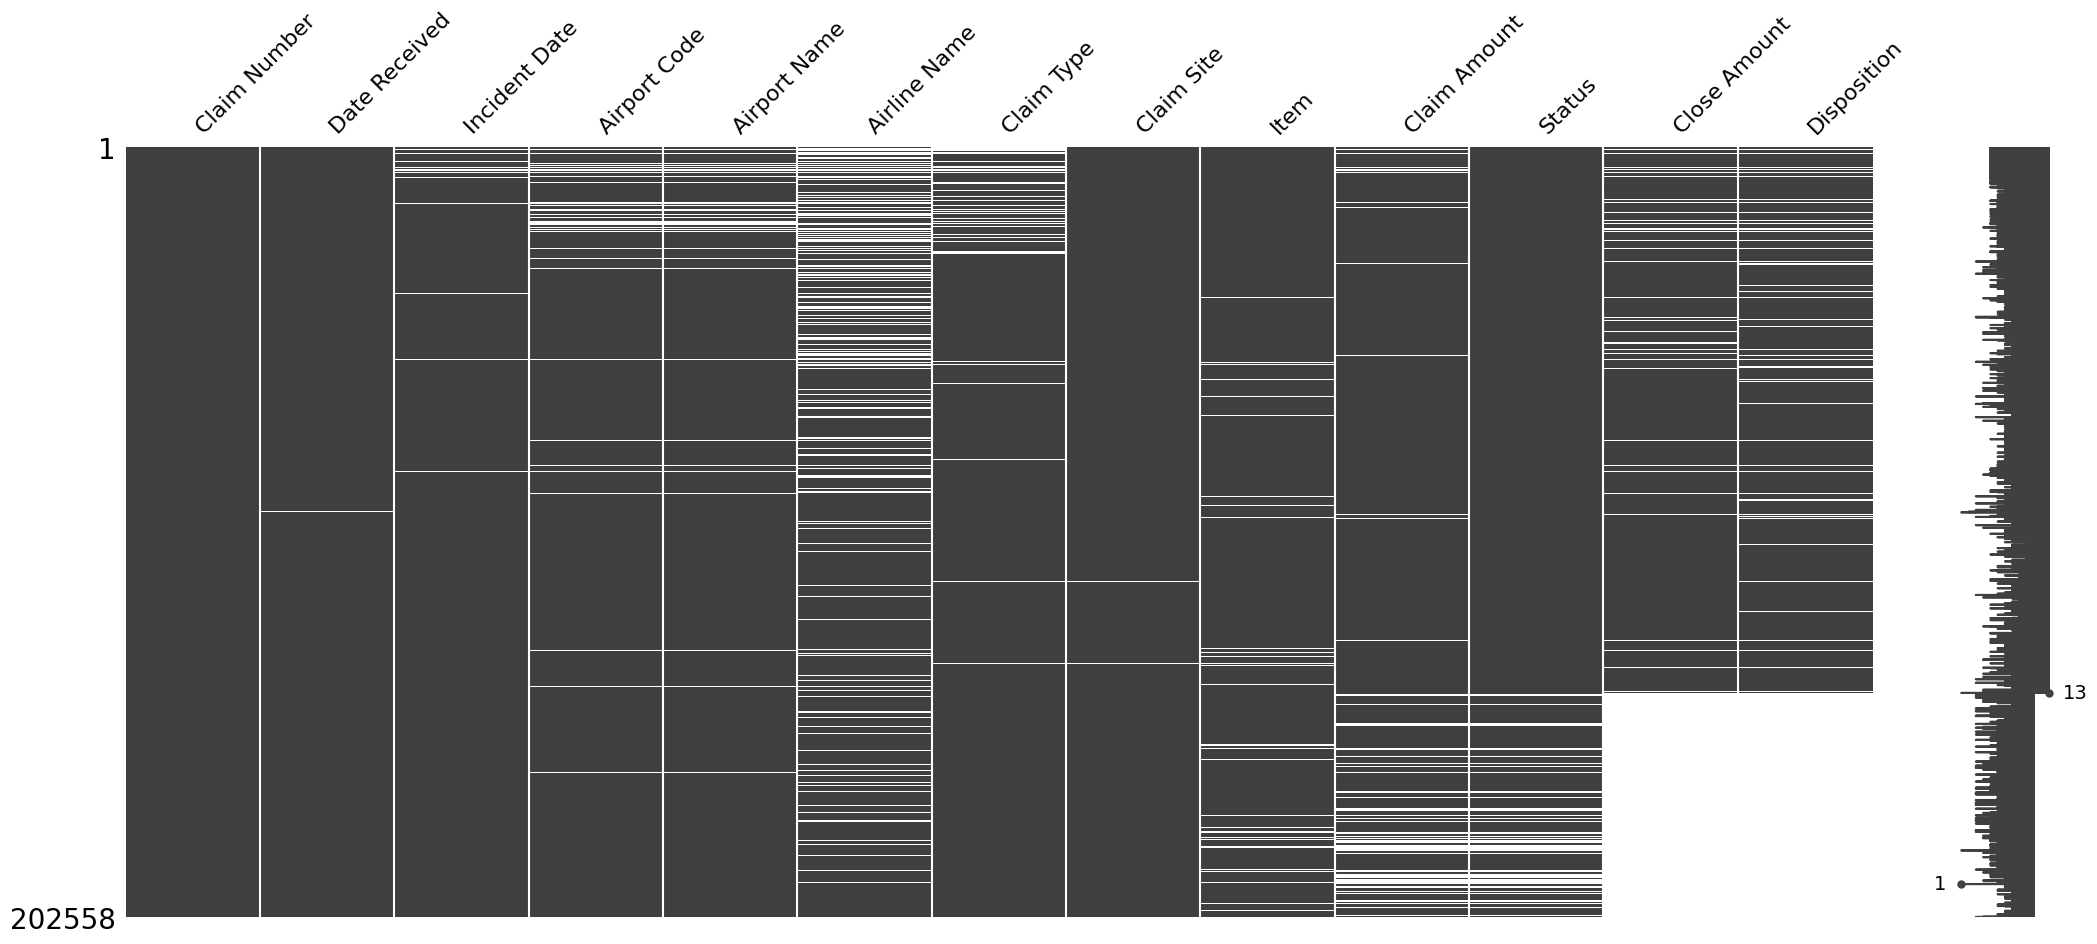

In [213]:
# Sebaran missing value di dalam data
msno.matrix(df)

dapat disimpulkan bahwa dataset ini memiliki <i>missing value</i> yang tidak terlalu banyak, kecuali untuk kolom `Close Amount` dan `Disposition` yang mencapai 35% dari jumlah data. berdasarkan heatmap, dapat dilihat dari kedua kolom tersebut sangat banyak <i>missing value</i> dibaris akhir dataset. <br><br>
Untuk mengatasi masalah ini, opsi untuk menghapus <i>missing value</i> tidak disarankan karena kolom yang merupakan target (`Close Amount` dan `Disposition`) untuk dianalisis memiliki <i>missing value</i> yang banyak. Sehingga saya akan mencoba mengisi <i>missing value</i> berdasarkan base knowledge atau dengan kata lain dengan nilai yang sebagaimana mestinya. Jika tidak bisa menarik kesimpulan berdasarkan base knowledge, maka akan digantikan dengan cara mengisi <i>missing value</i> dengan nilai central tendency dari variabel tsb. Namun ketika terdapat rows yang memiliki NaN values hampir disetiap kolom, maka sebaiknya dihapus saja karena tidak ada yang dapat disimpulkan.

In [214]:
# Cek total baris missing value

df[df.isna().any(axis=1)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approved,75.0,Approve in Full
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Denied,NaN,Deny
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),16.71,Approved,17.0,Approve in Full
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other; Clothing,NaN,NaN,NaN,NaN
204263,2015123027969,2015-12-17,2015-12-02,NaN,NaN,NaN,Property Damage,Checked Baggage,Audio/Video; Home Decor,NaN,NaN,NaN,NaN
204264,2016010428072,2015-12-22,2015-12-20,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing,NaN,NaN,NaN,NaN
204265,2016011328300,2015-12-30,2015-12-28,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,NaN,NaN,NaN


In [215]:
print(f"Total baris yang memiliki missing value : {df[df.isna().any(axis=1)].shape[0]}")

Total baris yang memiliki missing value : 108603


### Handling Close Amount & Disposition

pertama, mari kita handle variabel yang memiliki <i> missing value </i> terbanyak terlebih dahulu. Berdasarkan deskripsi kolom dataset ini, kolom `Disposition` memiliki hubungan dengan kolom `Status` dan `Close Amount`, karena kolom `Disposition` merupakan nilai yang diisi berdasarkan `Status`, `Close Amount`, dan `Claim Amount`. Agar lebih mudah dipahami, salah satu contohnya adalah kolom `Disposition` akan bernilai 'Approved in full' apabila kolom `status` bernilai 'Approved' dan `Close Amount` bernilai sama dengan kolom `Claim Amount`. <br><br>
Sekarang mari kita cek seberapa banyak kolom `Disposition` yang bernilai NaN (<i>missing value</i>) ketika `Status`, `Close Amount`, dan `Claim Amount` juga bernilai NaN.

In [219]:
display(df[['Claim Amount','Status','Close Amount','Disposition']][(df['Disposition'].isna()) & (df['Close Amount'].isna()) & (df['Claim Amount'].isna()) & (df['Status'].isna())])
print(f"persentase : {(len(df[(df['Disposition'].isna()) & (df['Close Amount'].isna()) & (df['Claim Amount'].isna()) & (df['Status'].isna())])/len(df))*100}")

,Claim Amount,Status,Close Amount,Disposition
97231,NaN,NaN,NaN,NaN
145144,NaN,NaN,NaN,NaN
145148,NaN,NaN,NaN,NaN
145154,NaN,NaN,NaN,NaN
145158,NaN,NaN,NaN,NaN
...,...,...,...,...
204262,NaN,NaN,NaN,NaN
204263,NaN,NaN,NaN,NaN
204264,NaN,NaN,NaN,NaN
204265,NaN,NaN,NaN,NaN


persentase : 6.2678343980489535


karena keempat variabel tsb berkaitan, sehingga sulit untuk mengisi kolom `Disposition` dan `Close Amount` jika variabel dependennya juga kosong, dan jml data tidak terlalu besar, maka akan dihapus saja.

In [220]:
df.drop(index=df[(df['Disposition'].isna()) & (df['Close Amount'].isna()) & (df['Claim Amount'].isna()) & (df['Status'].isna())].index,inplace=True)

In [221]:
# Cek unique dari status ketika disposition NaN

df[(df['Disposition'].isna()) & (df['Status'].isna() == False)]['Status'].value_counts()

Denied                                                                                                                           28206
Approved                                                                                                                         12337
Canceled                                                                                                                         6922 
Settled                                                                                                                          5750 
Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.    5292 
Closed as a contractor claim                                                                                                     1291 
In litigation                                                                                                                    36   
Claim entered                                          

berdasarkan base knowledge, mari kita buat beberapa rule untuk mengisi kolom `Disposition` dan `Close Amount` berdasarkan nilai `status`<br><br>

1. `status` = 'Denied'/'Insufficient ...' --> `Disposition` = 'Deny', `Close Amount` = 0.0
1. `status` = 'Approved', asumsi `Close Amount` dan `Claim Amount` tidak NaN<br>
--> jika `Close Amount` = `Claim Amount` maka `Disposition` = 'Approve in full'<br>
--> jika `Close Amount` != `Claim Amount` maka `Disposition` = 'Settle',
1. `status` = 'Canceled'/'Settled'/'Closed as a Contractor Claim' --> `Disposition` = 'Settle', `Close Amount` = 0.0
1. `status` = 'In litigation'/'In review'/'Claim has been assigned for further investigation ' --> `Disposition` = 'Not Available', hal ini karena proses penyelesaian belum ada, jadi belum bisa disimpulkan 'Approved in full', 'Settle' atau 'Deny', `Close Amount` = 0.0



#### Rule 1

In [222]:
condition = (df['Status'] == 'Denied') | (df['Status'] == 'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.')

df['Disposition'][(df['Disposition'].isna()) & (condition)] = 'Deny'

C:\Users\asus\AppData\Local\Temp\ipykernel_5488\3875666076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Disposition'][(df['Disposition'].isna()) & (condition)] = 'Deny'


In [223]:
# Cek unique dari status ketika disposition NaN

df[(df['Disposition'].isna()) & (df['Status'].isna() == False)]['Status'].value_counts()

Approved                                             12337
Canceled                                             6922 
Settled                                              5750 
Closed as a contractor claim                         1291 
In litigation                                        36   
Claim entered                                        14   
In review                                            7    
Claim has been assigned for further investigation    1    
Name: Status, dtype: int64

In [224]:
df['Close Amount'][df['Disposition']=='Deny'] = 0.0

C:\Users\asus\AppData\Local\Temp\ipykernel_5488\1088833240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close Amount'][df['Disposition']=='Deny'] = 0.0


#### Rule 2

In [226]:
df[(df['Disposition'].isna()) & ((df['Close Amount'].isna() == False)) & (df['Status'] == 'Approved')]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition


Nampaknya, asumsi rule 2 tidak dapat terpenuhi karena untuk kondisi dimana `status`nya 'approved', `close amount`nya bernilai NaN<br><br>

sehingga mari kita isi close amountnya menggunakan nilai rata-rata dari variabel tsb. kenapa tidak median walaupun pada bagian uji normalitas variabel ini jelas tidak terdistribusi normal? karena nilai mediannya 0, jika diisi 0 nanti pengaruh ke `Disposition` nya menjadi 'Deny' sedangkan pada `Status` jelas tertulis 'Approved'

In [227]:
# Nilai NaN pada close amount ketika status bernilai 'Approved' akan diinputkan nilai rata-rata dari close amount
df['Close Amount'][(df['Status'] == 'Approved') & (df['Close Amount'].isna())] = df['Close Amount'].mean()

# sehingga menyebabkan Disposition diinputkan 'Settle'
df['Disposition'][(df['Status'] == 'Approved') & (df['Disposition'].isna())] = 'Settle'

C:\Users\asus\AppData\Local\Temp\ipykernel_5488\756119690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close Amount'][(df['Status'] == 'Approved') & (df['Close Amount'].isna())] = df['Close Amount'].mean()
C:\Users\asus\AppData\Local\Temp\ipykernel_5488\756119690.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Disposition'][(df['Status'] == 'Approved') & (df['Disposition'].isna())] = 'Settle'


#### Rule 3

In [228]:
df['Disposition'][(df['Disposition'].isna()) & ((df['Status'] == 'Closed as a contractor claim') | (df['Status'] == 'Settled') | (df['Status'] == 'Canceled'))] = 'Settle'
df['Close Amount'][(df['Status'] == 'Closed as a contractor claim') | (df['Status'] == 'Settled') | (df['Status'] == 'Canceled')] = 0.0

C:\Users\asus\AppData\Local\Temp\ipykernel_5488\3605052045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Disposition'][(df['Disposition'].isna()) & ((df['Status'] == 'Closed as a contractor claim') | (df['Status'] == 'Settled') | (df['Status'] == 'Canceled'))] = 'Settle'
C:\Users\asus\AppData\Local\Temp\ipykernel_5488\3605052045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close Amount'][(df['Status'] == 'Closed as a contractor claim') | (df['Status'] == 'Settled') | (df['Status'] == 'Canceled')] = 0.0


#### Rule 4

In [229]:
df['Disposition'][(df['Disposition'].isna()) & ((df['Status'] == 'In litigation') | (df['Status'] == 'In review') | (df['Status'] == 'Claim has been assigned for further investigation'))] = 'Not Available'
df['Close Amount'][df['Disposition'] == 'Not Available'] = 0.0

C:\Users\asus\AppData\Local\Temp\ipykernel_5488\1852626784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Disposition'][(df['Disposition'].isna()) & ((df['Status'] == 'In litigation') | (df['Status'] == 'In review') | (df['Status'] == 'Claim has been assigned for further investigation'))] = 'Not Available'
C:\Users\asus\AppData\Local\Temp\ipykernel_5488\1852626784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close Amount'][df['Disposition'] == 'Not Available'] = 0.0


#### Rule 5 : Status = 'Claim entered'

In [230]:
# Cek karakteristik claim dengan status 'Claim entered'

df[df['Status'] == 'Claim entered']

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
97146,2011040782019,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Claim entered,NaN,NaN
97147,2012043093358,NaT,2012-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Claim entered,NaN,NaN
97148,2012051694045,NaT,2012-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Claim entered,NaN,NaN
97149,2012053194451,NaT,2011-10-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Claim entered,NaN,NaN
97150,2012062694910,NaT,2012-06-26,NaN,NaN,NaN,NaN,NaN,Jewelry - Fine,NaN,Claim entered,NaN,NaN
97151,2012062995031,NaT,2012-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Claim entered,NaN,NaN
97152,2012080395869,NaT,2012-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Claim entered,NaN,NaN
97153,2012101097504,NaT,2012-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Claim entered,NaN,NaN
97154,2012101797691,NaT,2012-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Claim entered,NaN,NaN
97155,2012102097805,NaT,2012-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Claim entered,NaN,NaN


dari karakteristik claim yang berstatus 'Claim entered', sepertinya `Status` 'Claim Entered' ini merupakan default system ketika claimant sedang mengisi claim, dan ada kemungkinan ketika claimant sudah mengisi beberapa atribut namun tidak jadi mengisi form claim atau dengan kata lain menutup form tersebut. Berdasarkan base knowledge yang saya miliki, mungkin terjadi kesalahan dimana sistem tetap memasukkan data kedalam database walaupun claimant tidak menekan tombol submit pada form, sehingga menyebabkan banyak atribut yang kosong dengan `status` yang masih memiliki nilai default. sehingga untuk `status` = 'Claim entered' --> maka akan Dihapus

In [231]:
df.drop(index=df[df['Status'] == 'Claim entered'].index,inplace=True)

Sekarang mari kita cek missing value dari `Disposition` dan `Close Amount` lagi

In [80]:
df[(df['Close Amount'].isna()) | (df['Disposition'].isna())]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
7783,0604019L,2003-06-04,2003-04-24,LNK,Lincoln Municipal,UAL,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,80.00,In litigation,NaN,Approve in Full
28998,0226458M,2004-02-26,2003-12-24,BOS,Boston (Logan) International Airport,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,2200.00,In litigation,NaN,Settle
50640,2004122771105,2004-11-23,2004-10-12,NaN,NaN,NaN,Property Damage,Checked Baggage,Locks,10.00,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,Approve in Full
53593,2005020275308,2005-01-04,NaN,MCO,Orlando International Airport,NaN,NaN,Checked Baggage,NaN,38.77,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,Approve in Full
55397,2005021776379,2005-01-24,2005-01-16,NaN,NaN,NaN,Property Damage,NaN,Other,15.00,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,Approve in Full
63988,2005051784854,2005-05-16,2005-01-13,DCA,Ronald Reagan Washington National Airport,American Airlines,Passenger Property Loss,Checked Baggage,Other,12.33,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,NaN,Approve in Full
79920,2006020701096,2006-01-31,2006-01-17,KOA,Kona International,UAL,Passenger Property Loss,Checked Baggage,Cameras - Digital,3000.00,In litigation,NaN,Settle
84775,2006050905751,2006-05-03,2006-04-22,HNL,Honolulu International Airport,Continental Airlines,Passenger Property Loss,Checkpoint,Jewelry - Fine; Watches - Expensive more than $100,7893.83,In review,NaN,Approve in Full
87509,2005100594089,2006-06-28,2005-01-26,MDW,Midway International Airport,Northwest Airlines,Personal Injury,Checkpoint,NaN,175000.00,In litigation,NaN,Settle
97306,2007010518374,2007-01-03,2006-11-28,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,1515.30,In litigation,NaN,Settle


dari tabel diatas, tenyata masih ada NaN values dari kolom `Close Amount`, karena kondisi untuk tabel diatas tidak memenuhi ke 5 rule. Dapat dilihat dari baris pertama tabel diatas, `status` claim bernilai 'In litigation' namun disposition bernilai 'Approved in full'. Hal tersebut menurut saya tidak masuk akal, karena claim belum bersifat terselesaikan atau bahkan belum di bayar ganti rugi secara full karena masih dalam proses pengadilan. Sehingga untuk data-data yang ada di tabel diatas, lebih baik dihapus saja daripada memberikan analisis yang ambigu.

In [232]:
df.drop(index=df[(df['Close Amount'].isna()) | (df['Disposition'].isna())].index,inplace=True)

In [233]:
df_missing = df.isna().sum().reset_index()
df_missing.columns = ['kolom','missing_value']
df_missing['persentase'] = df_missing['missing_value']/len(df)
df_missing

,kolom,missing_value,persentase
0,Claim Number,0,0.000000
1,Date Received,244,0.001285
2,Incident Date,2176,0.011462
3,Airport Code,8419,0.044349
4,Airport Name,8419,0.044349
5,Airline Name,36753,0.193603
6,Claim Type,7906,0.041646
7,Claim Site,770,0.004056
8,Item,6505,0.034266
9,Claim Amount,3980,0.020965


Untuk menghasilkan analisis yang baik, tentunya perlu data yang jelas. Sehingga apabila dalam suatu baris rata-rata setiap variabelnya memiliki data yang kosong, maka dihapus saja, karena asumsi bahwa baris tersebut tidak layak di analisis (terlalu banyak data yang kosong di setiap variabel). Berdasarkan kolom pada dataset ini yang berjumlah 12 kollom, menurut saya apabila dalam suatu baris terdapat lebih dari atau sama dengan 7 variabel yang kosong, maka akan dihapus.

In [235]:
# hitung jumlah data yang kosong di setiap baris

df['isnull'] = df.isnull().sum(axis=1)
df[df['isnull'] >= 7]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,isnull
21287,2004072059830,2003-12-01,2003-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canceled,0.0,Settle,7
30435,2004050450460,2004-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canceled,0.0,Settle,8
31470,2004060654820,2004-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4875.0,Settled,0.0,Settle,7
31816,2004051451950,2004-04-01,NaN,NaN,NaN,NaN,NaN,NaN,Clothing - Shoes; belts; accessories; etc.,NaN,Canceled,0.0,Settle,7
31941,2004051452119,2004-04-01,2004-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,0.0,Deny,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140865,2009082663001,2009-08-19,2009-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,0.0,Deny,7
141492,2009090863443,2009-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,0.0,Deny,8
142441,2009100764403,2009-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,0.0,Deny,8
144301,2010011167435,2009-12-02,2009-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,0.0,Deny,7


In [236]:
df.drop(index=df[df['isnull'] >= 7].index,inplace=True)
df.drop(columns='isnull',inplace=True)

### Handling Airline Names

Karena kolom `Airline Name` bersifat independen, maka untuk mengisi <i>missing value</i> kolom ini akan berdasarkan modus dari Airline Name di Airport Name yang bersangkutan.<br>
Contoh : <i>missing value</i> pada `Airline name` akan digantikan dengan 'Delta Air Lines' apabila `Airport Name`nya 'Salt Lake City International Airport', hal ini dikarenakan oleh 'Delta Air Lines' merupakan pesawat yang paling sering muncul di bandara 'Salt Lake City International Airport'. Begitu juga dengan pengatasan missing value Airline Name di Aiport Name lainnya.

In [238]:
for val in df['Airport Name'][df['Airline Name'].isna()].unique():
    try:
        df['Airline Name'][(df['Airline Name'].isna()) & (df['Airport Name'] == val)] = df['Airline Name'][df['Airport Name'] == val].mode()[0]
    except:
        continue

C:\Users\asus\AppData\Local\Temp\ipykernel_5488\2407608752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Airline Name'][(df['Airline Name'].isna()) & (df['Airport Name'] == val)] = df['Airline Name'][df['Airport Name'] == val].mode()[0]
C:\Users\asus\AppData\Local\Temp\ipykernel_5488\2407608752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Airline Name'][(df['Airline Name'].isna()) & (df['Airport Name'] == val)] = df['Airline Name'][df['Airport Name'] == val].mode()[0]
C:\Users\asus\AppData\Local\Temp\ipykernel_5488\2407608752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [240]:
display(df[df['Airline Name'].isna()])
display(df[df['Airline Name'].isna()]['Airport Name'].unique())
display(df[df['Airport Name'] == 'Headquarters'])

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
14,0616771L,2002-07-12,NaN,NaN,NaN,NaN,NaN,Other,Clothing - Shoes; belts; accessories; etc.,NaN,Denied,0.000000,Deny
17,15361,2002-07-15,2002-03-11,NaN,NaN,NaN,Personal Injury,Motor Vehicle,Luggage (all types including footlockers),110000.00,Denied,0.000000,Deny
18,0616636L,2002-07-18,NaN,NaN,NaN,NaN,NaN,Other,Luggage (all types including footlockers),NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,0.000000,Deny
20,0616540L,2002-07-22,NaN,NaN,NaN,NaN,NaN,Other,Other,NaN,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,0.000000,Deny
22,0616723L,2002-08-05,NaN,NaN,NaN,NaN,NaN,Other,Clothing - Shoes; belts; accessories; etc.,NaN,Denied,0.000000,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204189,2015070223650,2015-06-29,2015-05-08,ZZX,Non TSA Airport (motor vehicle),NaN,Employee Loss (MPCECA),Motor Vehicle,NaN,250.00,Approved,72.142223,Settle
204202,2015092425588,2015-09-10,2015-08-31,ZZX,Non TSA Airport (motor vehicle),NaN,Motor Vehicle,Other,NaN,656.56,Approved,72.142223,Settle
204203,2015102026116,2015-09-29,2015-09-22,ZZX,Non TSA Airport (motor vehicle),NaN,Motor Vehicle,Motor Vehicle,NaN,1520.85,Approved,72.142223,Settle
204204,2015101326019,2015-10-13,2015-07-16,ZZX,Non TSA Airport (motor vehicle),NaN,Motor Vehicle,Motor Vehicle,NaN,643.32,Approved,72.142223,Settle


array([nan, 'Non TSA Airport (motor vehicle)', 'Headquarters',
       'Boone County Regional Airport', 'Grant County',
       'Lake Havasu City Municipal', 'Groton - New London; CT',
       'Homer Airport', 'Vernal/Uintah County', 'Griffiss Intl; ROME; NY',
       'Unspecified Personal Injury', 'Athens/Ben Epps'], dtype=object)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
39067,2004063057971,2004-06-30,2004-06-28,HDQ,Headquarters,NaN,Motor Vehicle,Motor Vehicle,Other,2133.00,Settled,0.000000,Settle
61207,2005061686512,2005-04-07,2004-12-01,HDQ,Headquarters,NaN,Motor Vehicle,Motor Vehicle,Other,335.21,Approved,335.210000,Approve in Full
75134,2005110895769,2005-11-08,2005-06-20,HDQ,Headquarters,NaN,Motor Vehicle,Motor Vehicle,Other,525.11,Settled,0.000000,Settle
77543,2005122398352,2005-12-23,2005-12-13,HDQ,Headquarters,NaN,Motor Vehicle,Motor Vehicle,NaN,1405.00,Approved,1405.000000,Approve in Full
77639,2005122898562,2005-12-27,2005-12-08,HDQ,Headquarters,NaN,Employee Loss (MPCECA),Other,Clothing - Shoes; belts; accessories; etc.,400.00,Denied,0.000000,Deny
98717,2007012419292,2007-01-24,2006-12-18,HDQ,Headquarters,NaN,Motor Vehicle,Motor Vehicle,Other,563.64,Denied,0.000000,Deny
101828,2007033023237,2007-03-23,2007-02-28,HDQ,Headquarters,NaN,Motor Vehicle,Motor Vehicle,Automobile Parts,1249.08,Settled,0.000000,Settle
102141,2007033023289,2007-03-30,2007-02-28,HDQ,Headquarters,NaN,Motor Vehicle,Motor Vehicle,Automobile Parts,1790.41,Denied,0.000000,Deny
102358,2007040423465,2007-04-04,2007-03-23,HDQ,Headquarters,NaN,Employee Loss (MPCECA),Other,MP3 Players-(iPods; etc),250.00,Denied,0.000000,Deny
115404,2007122736961,2007-12-19,2007-06-29,HDQ,Headquarters,NaN,Motor Vehicle,Motor Vehicle,NaN,941.27,Approved,941.270000,Approve in Full


perlu diperhatikan bahwa masih terdapat <i>missing value</i> pada kolom `Airline Name`. Hal ini disebabkan oleh value pada `Airport Name` yang juga kosong atau bandara tersebut tidak memiliki setidaknya 1 nama pesawat, sehingga tidak menghasilkan nilai modus. Salah satu contohnya adalah Bandara 'Groton - New London; CT', bandara ini tidak memiliki penerbangan apapun dalam datanya, sehingga untuk mengisi nilai yang kosong pada `Airline Name` tidak dapat dilakukan. Karakteristik data yang seperti ini akan dihapus saja.

In [241]:
df.drop(index=df[df['Airline Name'].isna()].index,inplace=True)

### Handling Incident Date, Aiport Code, Airport Name

Faktanya, kita ketika melaporkan suatu kejadian seringkali ada beberapa informasi yang lupa sehingga tidak dapat mengisi form insiden secara lengkap, contohnya lupa tentang waktu kejadian dan lokasi kejadian. Namun pada status terdapat nilai "Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.", yang artinya informasi untuk memproses klaim tidak cukup karena terdapat 'required field' yang tidak diisi, sehingga lokasi kejadian dan waktu kejadian dibutuhkan untuk melanjutkan proses claim, jika tidak claim akan gagal diproses.<br><br>

berdasarkan alasan tsb, untuk mengatasi <i>missing value</i> ketiga kolom ini adalah dihapus.

In [242]:
# Cek total baris missing value

df[(df['Incident Date'].isna()) | (df['Airport Code'].isna()) | (df['Airport Name'].isna())]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
19,0714534M,2002-07-22,2002-03-06,NaN,NaN,Northwest Airlines,Property Damage,Other,Photographic Film,68.00,Denied,0.0,Deny
38,18171,2002-09-16,2002-07-23,NaN,NaN,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,250.00,Settled,0.0,Settle
42,16961,2002-09-18,2002-08-05,NaN,NaN,Delta Air Lines,NaN,Checked Baggage,Other,175.00,Settled,0.0,Settle
119,0616733L,2002-10-23,2002-08-15,NaN,NaN,Delta Air Lines,Property Damage,Other,Other,120.00,Denied,0.0,Deny
163,19814,2002-11-04,2002-10-09,NaN,NaN,Aloha Airlines,Passenger Property Loss,Checkpoint,Cameras - Digital,250.00,Approved,250.0,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143436,2010010767291,2009-11-09,2009-11-05,NaN,NaN,UAL,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,108.90,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,0.0,Deny
143568,2009112365565,2009-11-12,2009-11-06,NaN,NaN,Jet Blue,Passenger Property Loss,Checked Baggage,NaN,589.37,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,0.0,Deny
143721,2009112465704,2009-11-17,2009-11-05,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics - Perfume; toilet articles; medicines; soaps; etc.,200.00,Canceled,0.0,Settle
143812,2009120165829,2009-11-18,2009-11-05,NaN,NaN,AirTran Airlines,Passenger Property Loss,Checked Baggage,Audio - CD's,25.00,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,0.0,Deny


In [243]:
df.drop(index=df[(df['Incident Date'].isna()) | (df['Airport Code'].isna()) | (df['Airport Name'].isna())].index,inplace=True)

### Handling Date Received

Asumsi sistem dari pihak TSA mengalamai error dalam menggenerasi waktu klaim diajukan, karena kita tidak memiliki data log dari sistem tsb, Maka untuk variabel `Date Received` yang memiliki <i>missing value</i> akan dihapus saja.

In [244]:
df.drop(index=df[df['Date Received'].isna()].index,inplace=True)

### Handling Others Variables

<AxesSubplot:>

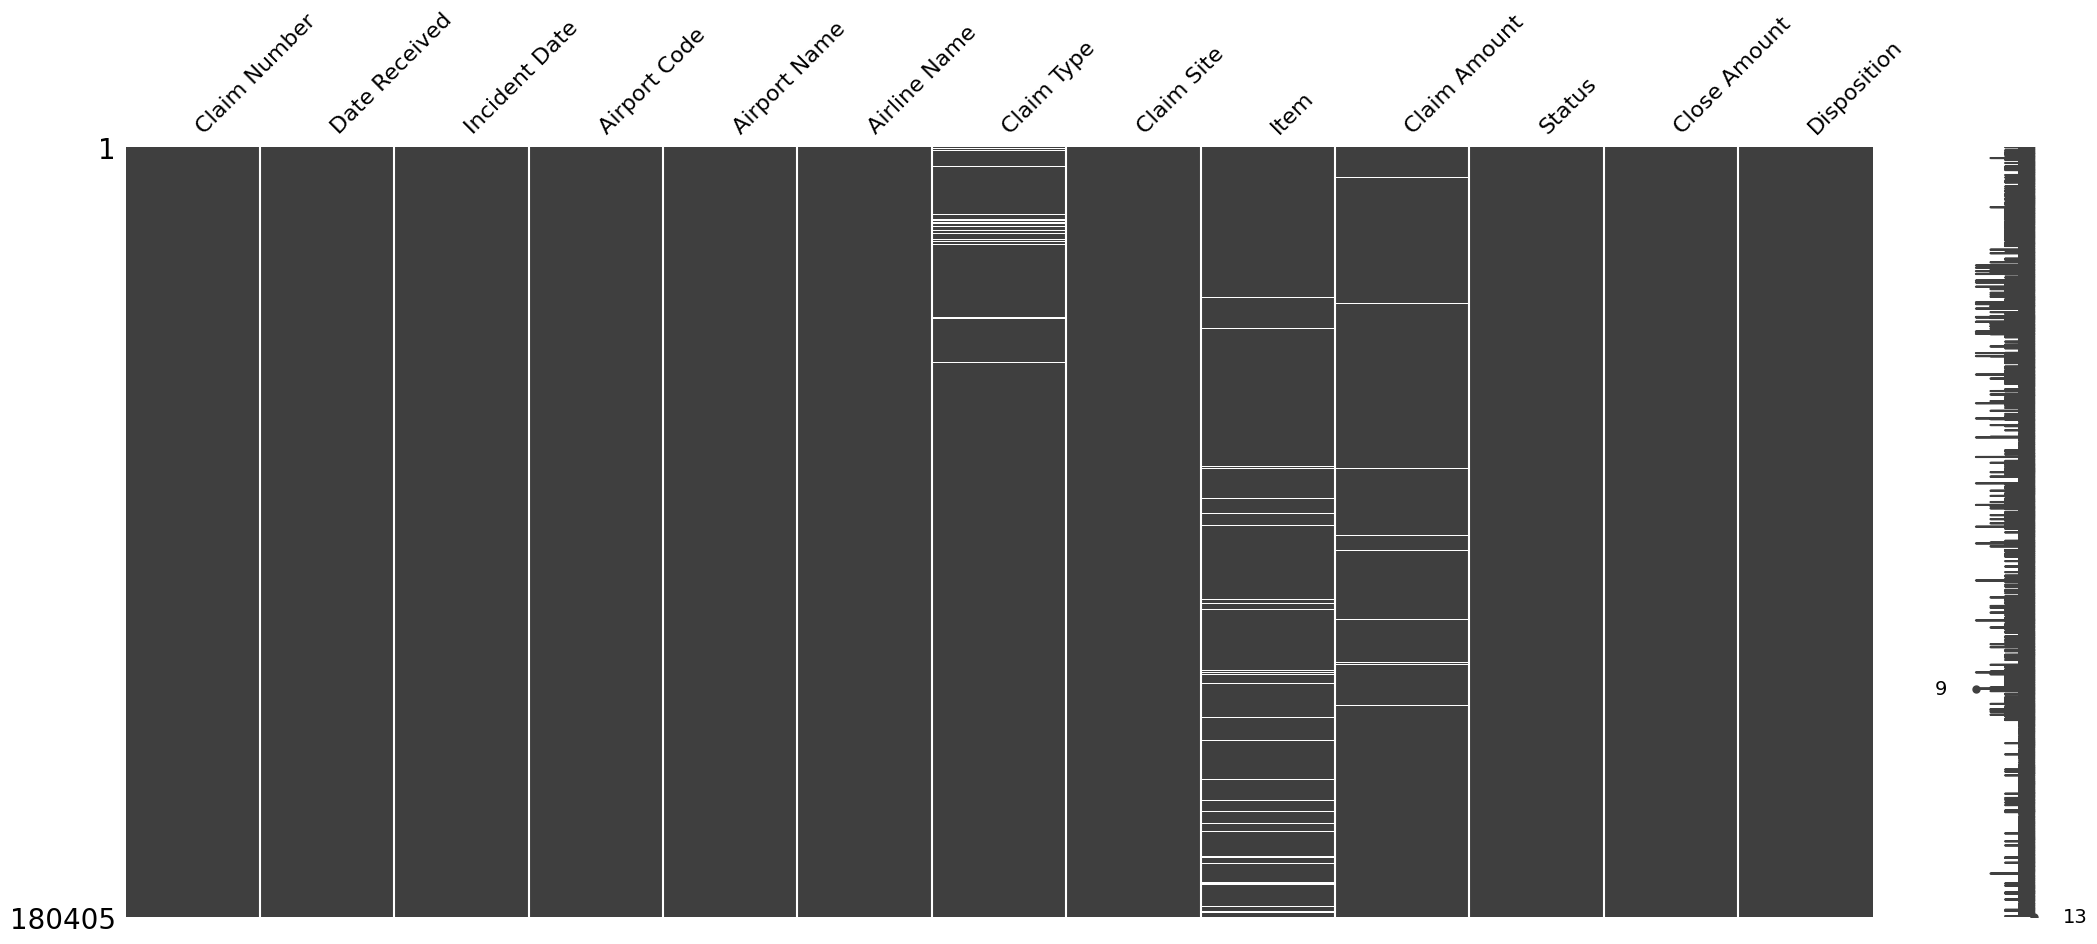

In [91]:
msno.matrix(df)

berdasarkan matrix missing value diatas, terlihat bahwa <i>missing value</i> dari keempat variable tersebut tidak saling berkaitan, sehingga sedikit sulit untuk mengatasinya dengan base knowledge. Akan lebih baik jika diatasi dengan central tendency nya.

In [245]:
# Records that have Missing Value from Claim type, Item, Claim Site, and Claim Amount

df[(df['Claim Type'].isna()) | (df['Item'].isna()) | (df['Claim Site'].isna()) | (df['Claim Amount'].isna())]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approved,75.000000,Approve in Full
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),16.71,Approved,17.000000,Approve in Full
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,0.000000,Settle
15,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.000000,Deny
16,15324,2002-07-12,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Other,Luggage (all types including footlockers),50.00,Denied,0.000000,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204134,2015093025762,2015-09-17,2015-07-11,TXK,Texarkana Regional Airport,American Airlines,Property Damage,Checked Baggage,NaN,125.00,Approved,72.142223,Settle
204137,2015013020302,2015-01-30,2015-01-27,TYR,Tyler Pounds Field,American Eagle,Passenger Property Loss,Checked Baggage,NaN,11.72,Settled,0.000000,Settle
204139,2015022020728,2015-02-20,2015-01-06,TYS,Mcghee Tyson ;Knoxville,Delta Air Lines,Property Damage,Checked Baggage,NaN,25.00,Settled,0.000000,Settle
204155,2015032321426,2015-03-23,2015-03-15,XNA,Northwest Arkansas Regional,USAir,Passenger Property Loss,Checked Baggage,NaN,115.00,Approved,72.142223,Settle


Dilihat dari tabel diatas, karakteristik data yang memiliki <i>missing value</i> cukup kredibel. Variable tersebut tidak memiliki hubungan dengan variabel lain, sehingga untuk mengatasi <i>missing value</i> nya dengan menggunakan modus saja untuk kategorical varibel dan median untuk numerikal variabel.

In [247]:
# Filling NaN Values with central tendency of each variables

df['Claim Type'].fillna(df['Claim Type'].mode()[0],inplace=True)
df['Item'].fillna(df['Item'].mode()[0],inplace=True)
df['Claim Site'].fillna(df['Claim Site'].mode()[0],inplace=True)
df['Claim Amount'].fillna(df['Claim Amount'].median(),inplace=True)

In [248]:
df.isna().sum()

Claim Number     0
Date Received    0
Incident Date    0
Airport Code     0
Airport Name     0
Airline Name     0
Claim Type       0
Claim Site       0
Item             0
Claim Amount     0
Status           0
Close Amount     0
Disposition      0
dtype: int64

## Outliers

Perlu diingat, sebelumnya telah disinggung bahwa terdapat Outliers pada variabel Claim Amount, hal itu disimpulkan berdasarkan ketidaknyataan jumlah claim yang diajukan yaitu lebih dari 1jt dolar.

In [249]:
display(df[df['Claim Amount'] > 1000000].head(10))
display(df[df['Claim Amount'] > 1000000]['Status'].value_counts())

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
216,20843,2002-11-12,2002-07-05,TSA,TSA - Non-Specified Airport,American Airlines,Personal Injury,Other,Clothing - Shoes; belts; accessories; etc.,10000000.0,Denied,0.0,Deny
5739,0428118L,2003-04-28,2003-03-15,GPT,Gulfport-Biloxi International,Delta Air Lines,Personal Injury,Checkpoint,Other,2000000.0,Denied,0.0,Deny
13640,0818500M,2003-08-18,2003-07-14,JFK,John F. Kennedy International,American Airlines,Personal Injury,Checked Baggage,Other,20000000.0,Denied,0.0,Deny
15546,1217801M,2003-09-09,2003-02-28,FLL,Ft. Lauderdale-Hollywood International,Delta Air Lines,Personal Injury,Checkpoint,Other,2000000.0,In litigation,0.0,Deny
38637,2004071559399,2004-06-24,2004-04-16,TPA,Tampa International,AirTran Airlines,Personal Injury,Checked Baggage,Other,2000000.0,Denied,0.0,Deny
38639,2004070658307,2004-06-24,2003-11-25,TPA,Tampa International,USAir,Personal Injury,Checkpoint,Other,10000000.0,In litigation,0.0,Not Available
40189,2004080560658,2004-07-13,2002-08-05,JFK,John F. Kennedy International,Jet Blue,Personal Injury,Checkpoint,Other,2000000.0,Settled,0.0,Settle
44163,2004090962486,2004-09-09,2004-08-04,HPN,Westchester County; White Plains,Jet Blue,Personal Injury,Other,Other,5000000.0,Canceled,0.0,Settle
48000,2004121068970,2004-10-21,2002-10-23,SJU,Luis Munoz Marin International,American Airlines,Personal Injury,Checkpoint,Other,1080680.0,Canceled,0.0,Settle
48001,2004102265632,2004-10-21,2002-10-23,SJU,Luis Munoz Marin International,American Airlines,Personal Injury,Checkpoint,Other,1080680.0,Denied,0.0,Deny


Denied                                                                                                                           31
In litigation                                                                                                                    8 
Canceled                                                                                                                         7 
Settled                                                                                                                          2 
Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.    1 
Name: Status, dtype: int64

Terlihat bahwa `claim amount` yang diatas 1jt dolar tidak ada satupun yang di Approve, sehingga jelas asumsi ketidakmasukakalan jumlah `Claim Amount` <b>terbukti</b> berdasarkan tabel diatas, sehingga akan kita hapus saja. Untuk Outliers yang ada di kolom `Close Amount`, akan dibiarkan saja karena kita tidak tahu kebenaran dari nilai tsb, maka akan dibiarkan saja.

In [250]:
df.drop(index=df[df['Claim Amount'] > 1000000].index, inplace=True)

In [97]:
# Clean Data

df.to_csv('tsa_claim_clean.csv',index=False)

# Data Analysis

Berdasarkan rumusan masalah, perusahaan ingin melihat karakteristik claim apa yang sering terjadi, terutama yang mengusut ganti rugi dengan jumlah besar. Hal ini dapat membantu perusahaan dalam meminimalisir terjadinya insiden berlebih. Sehingga untuk menjawab tujuan analisis tsb., beberapa kolom tidak digunakan yaitu Date Received, Incident Date, Airport Code/Aiport Name (pilih salah satu), Claim Amount, Status & Disposition. 

Alasan :
- Date Received/Incident Date : Waktu insiden terjadi / waktu klaim diajukan tidak berhubungan dengan jumlah insiden yang terjadi / biaya ganti rugi yang dikeluarkan.
- Status & Disposition : Agar hasil analisis tidak bias. Temuan yang dihasilkan harus bisa merepresentasikan kejadian secara kesuluruhan, supaya tidak condong ke klaim berstatus approved atau deny.
- Claim Amount : Karena analisis dilakukan dari sisi perusahaan bukan dari sisi Claimant
- Airport Code/ Airport Name : Gunakan salah satu saja, saya lebih prefer Airport Name karena langsung menjelaskan nama bandaranya dibandingkan kodenya


In [98]:
df = pd.read_csv('tsa_claim_clean.csv')
df

C:\Users\asus\AppData\Local\Temp\ipykernel_5488\1341979222.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tsa_claim_clean.csv')


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approved,75.000000,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Southwest Airlines,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,0.000000,Settle
2,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Denied,0.000000,Deny
3,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Passenger Property Loss,Checkpoint,Eyeglasses - (including contact lenses),16.71,Approved,17.000000,Approve in Full
4,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,0.000000,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180351,2015042122048,2015-04-21,2015-03-15,YUM,Yuma International Airport,USAir,Passenger Property Loss,Checked Baggage,Other,149.99,Approved,72.142223,Settle
180352,2015042722126,2015-04-27,2015-04-22,YUM,Yuma International Airport,USAir,Passenger Property Loss,Checked Baggage,Computer & Accessories,0.00,Denied,0.000000,Deny
180353,2015051322493,2015-05-13,2015-04-18,YUM,Yuma International Airport,USAir,Property Damage,Checked Baggage,Other,46.51,Approved,72.142223,Settle
180354,2015080324457,2015-08-03,2015-03-19,YUM,Yuma International Airport,USAir,Passenger Property Loss,Checked Baggage,Hunting & Fishing Items,106.99,Approved,72.142223,Settle


#### by Airport Name, Airline Name

Pertama, analisis akan dilakukan dengan membandingkan jumlah insiden di Bandara dan Maskapai Penerbangan. Hal ini dilakukan karena insiden dapat terjadi karena kelalaian petugas bandara ataupun pihak maskapainya

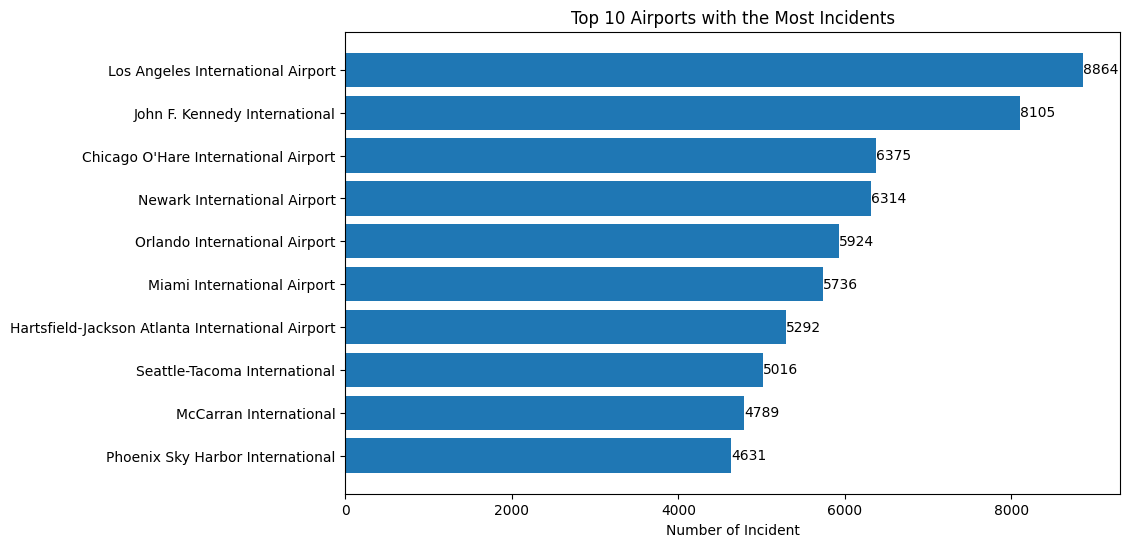

In [99]:
data_airport = df['Airport Name'].value_counts().reset_index().head(10).sort_values('Airport Name')

fig = plt.figure(figsize=(10,6))


splot = plt.barh(data_airport['index'],data_airport['Airport Name'])
plt.bar_label(splot)
plt.title('Top 10 Airports with the Most Incidents')
plt.xlabel('Number of Incident')
plt.show()

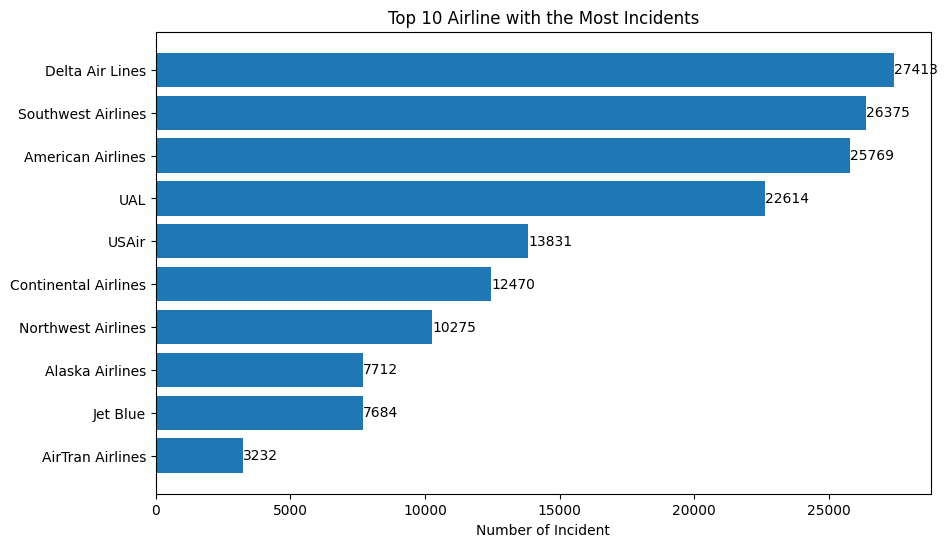

In [100]:
# by Airline Name

data_airline = df['Airline Name'].value_counts().reset_index().head(10).sort_values('Airline Name')
fig = plt.figure(figsize=(10,6))

splot = plt.barh(data_airline['index'],data_airline['Airline Name'])
plt.bar_label(splot)
plt.title('Top 10 Airline with the Most Incidents')
plt.xlabel('Number of Incident')
plt.show()

#### by Claim Site, Claim Type

Selanjutnya analisis dilakukan dengan melihat lokasi klaim dan jenis klaim dengan insiden terbanyak. Hal ini dilakukan untuk memfilter kategori di analisis selanjutnya

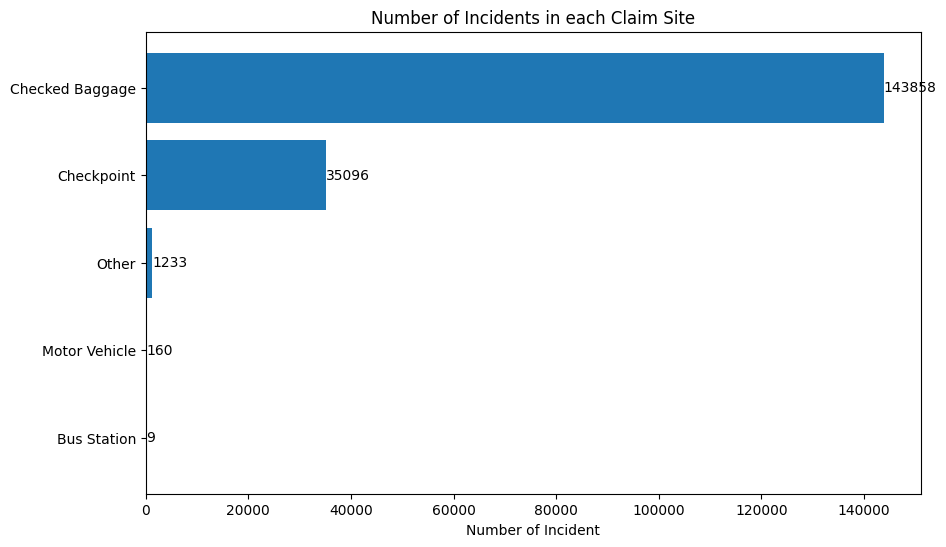

In [101]:
# by Claim Site

data_claim_site = df['Claim Site'].value_counts().reset_index().sort_values('Claim Site')

fig = plt.figure(figsize=(10,6))

splot = plt.barh(data_claim_site['index'],data_claim_site['Claim Site'])
plt.bar_label(splot)
plt.title('Number of Incidents in each Claim Site')
plt.xlabel('Number of Incident')
plt.show()

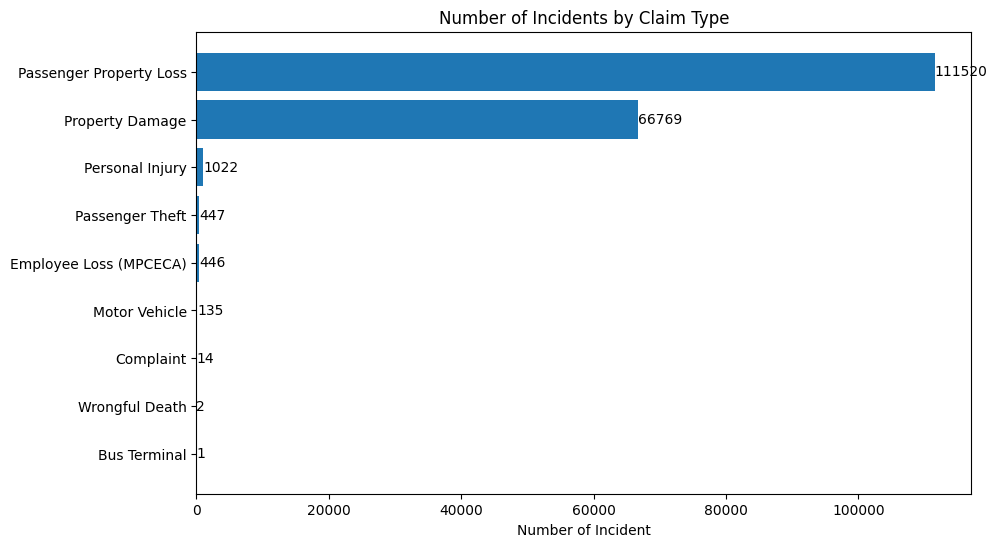

In [102]:
# plotting by Claim Type

data_claim_type = df['Claim Type'].value_counts().reset_index().sort_values('Claim Type')

fig = plt.figure(figsize=(10,6))

splot = plt.barh(data_claim_type['index'],data_claim_type['Claim Type'])
plt.bar_label(splot)
plt.title('Number of Incidents by Claim Type')
plt.xlabel('Number of Incident')
plt.show()

Berdasarkan Claim Sitenya, lokasi Checked Baggage merupakan penyumbang insiden terbanyak dan diikuti oleh lokasi Checkpoint. Sedangkan apabila berdasarkan jenis klaimnya, insiden yang sering terjadi adalah kehilangan barang dan barang rusak.

#### Total Close Amount by Claim Type

Selanjutnya untuk melihat ciri-ciri klaim yang paling memakan biaya ganti rugi, analisis dilakukan dengan membandingkan jumlah biaya ganti rugi berdasarkan tipe klaim

In [109]:
data = df.groupby(['Claim Type'])[['Close Amount']].sum().reset_index()
data['Close Amount'] = data['Close Amount'].apply(lambda x: int(x))
data = data.sort_values('Close Amount',ascending=False)
data

,Claim Type,Close Amount
4,Passenger Property Loss,2922269
7,Property Damage,2714147
3,Motor Vehicle,92993
6,Personal Injury,85115
2,Employee Loss (MPCECA),21133
5,Passenger Theft,13722
1,Complaint,360
0,Bus Terminal,0
8,Wrongful Death,0


Tentu saja, karena jumlah insiden paling banyak bertipe Kehilangan dan Kerusakan barang, maka jumlah biaya ganti rugi juga paling banyak dikeluarkan untuk claim yang bertipe Kehilangan dan Kerusakan barang dengan total secara berturut-turut adalah $2,922,269 dan $2,714,147. Sehingga dapat disimpulkan bahwa TSA perlu membayar ganti rugi dengan total lebih dari 5jt dolar hanya untuk kehilangan dan kerusakan barang.

#### Number of Incident by Airport & Claim Site

Karena kita sudah tau lokasi mana yang memiliki jumlah insiden serta total ganti rugi terbanyak, maka sekarang analisis dilanjutkan dengan menjawab pertanyaan


<b>"Bagaimana dengan jumlah insiden di top 10 bandara dengan insiden terbanyak, berdasarkan lokasi checked baggage & checkpoint nya?"</b>

In [110]:
data_3 = df[(df['Airport Name'].isin(data_airport['index'].values)) & (df['Claim Site'].isin(data_claim_site[-2:]['index'].values))]
data_group = data_3.groupby(['Airport Name','Claim Site'])[['Claim Number']].count().reset_index()
data_group

,Airport Name,Claim Site,Claim Number
0,Chicago O'Hare International Airport,Checked Baggage,5091
1,Chicago O'Hare International Airport,Checkpoint,1228
2,Hartsfield-Jackson Atlanta International Airport,Checked Baggage,4085
3,Hartsfield-Jackson Atlanta International Airport,Checkpoint,1170
4,John F. Kennedy International,Checked Baggage,6402
5,John F. Kennedy International,Checkpoint,1640
6,Los Angeles International Airport,Checked Baggage,6795
7,Los Angeles International Airport,Checkpoint,1973
8,McCarran International,Checked Baggage,3782
9,McCarran International,Checkpoint,975


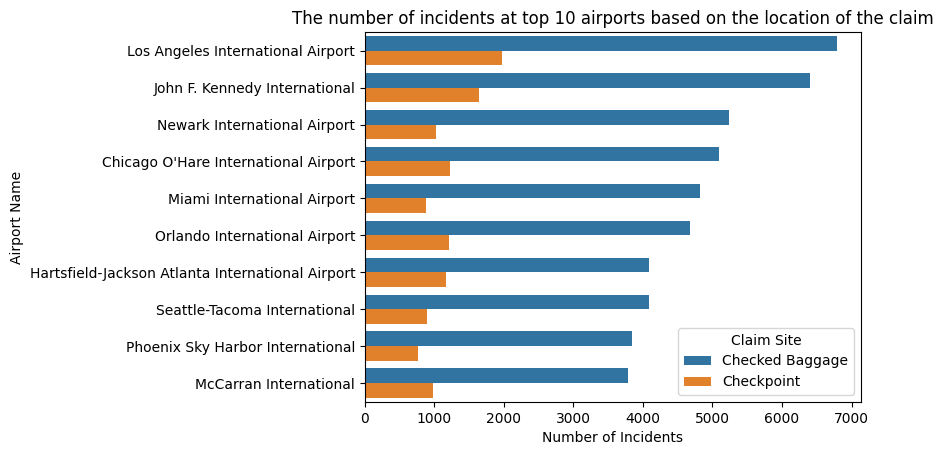

In [112]:
sns.barplot(data=data_group.sort_values(by='Claim Number',ascending=False), y='Airport Name',x='Claim Number',hue='Claim Site').set(title='The number of incidents at top 10 airports based on the location of the claim',xlabel='Number of Incidents')
plt.show()

Dari hasil visualisasi diatas terlihat jumlah insiden di lokasi Checked Bagage selalu lebih banyak dibanding Checkpoint disetiap Bandara.

#### Total Close Amount and Total Incident by Item 

Analisis selanjutnya adalah membandingkan total ganti rugi berdasarkan Item. Analisis ini dilakukan untuk memfilter kategori di step selanjutnya

In [126]:
data_item_1 = df.groupby('Item')[['Close Amount']].sum().sort_values('Close Amount',ascending=False).reset_index().head(10)
data_item_1['Close Amount'] = data_item_1['Close Amount'].apply(lambda x : int(x))

data_item_2 = df.groupby('Item')[['Claim Number']].count().sort_values('Claim Number',ascending=False).reset_index().head(10)

display(data_item_1,data_item_2)

,Item,Close Amount
0,Other,1500222
1,Computer - Laptop,610094
2,Jewelry - Fine,608976
3,Clothing - Shoes; belts; accessories; etc.,524090
4,Luggage (all types including footlockers),326365
5,Eyeglasses - (including contact lenses),279222
6,Cameras - Digital,265661
7,Travel Accessories,134328
8,Currency,134293
9,Baggage/Cases/Purses,100782


,Item,Claim Number
0,Other,38570
1,Luggage (all types including footlockers),17098
2,Clothing - Shoes; belts; accessories; etc.,13626
3,Jewelry - Fine,9232
4,Locks,8941
5,Cameras - Digital,8606
6,Computer - Laptop,8144
7,Baggage/Cases/Purses,5192
8,Computer & Accessories,3920
9,Clothing,3790


apabila kita menghiuraukan 'Others', maka dari tabel diatas kita tahu bahwa Barang yang memakan ganti rugi terbesar adalah Laptop/Komputer dan Perhiasan. Namun Laptop/Komputer dan Perhiasan bukan merupakan barang dengan insiden terbanyak, melainkan Koper. Bahkan, Eyeglasses yang termasuk kedalam 10 barang dengan harga ganti rugi tertinggi, tidak termasuk kedalam 10 barang dengan jumlah insiden terbanyak. Hal ini memberikan kita informasi bahwa barang-barang dengan harga ganti rugi yang tinggi tidak menjamin bahwa barang tersebut memiliki banyak insiden.

#### Close Amount by Item & Claim Type

In [127]:
data_item_by_claim_type = df[(df['Item'].isin(data_item_1['Item'][1:].values)) & (df['Claim Type'].isin(data_claim_type[-2:]['index'].values))].groupby(['Item','Claim Type'])[['Claim Number']].count()
data_item_by_claim_type

Claim Number
Item                                       Claim Type                           
Baggage/Cases/Purses                       Passenger Property Loss  763         
                                           Property Damage          4421        
Cameras - Digital                          Passenger Property Loss  7129        
                                           Property Damage          1401        
Clothing - Shoes; belts; accessories; etc. Passenger Property Loss  9614        
                                           Property Damage          3873        
Computer - Laptop                          Passenger Property Loss  4049        
                                           Property Damage          4060        
Currency                                   Passenger Property Loss  2938        
                                           Property Damage          14          
Eyeglasses - (including contact lenses)    Passenger Property Loss  2068        
                                           Property Damage          1524        
Jewelry - Fine                             Passenger Property Loss  8582        
                                           Property Damage          551         
Luggage (all types including footlockers)  Passenger Property Loss  1720        
                                           Property Damage          15330       
Travel Accessories                         Passenger Property Loss  2601        
                                           Property Damage          666

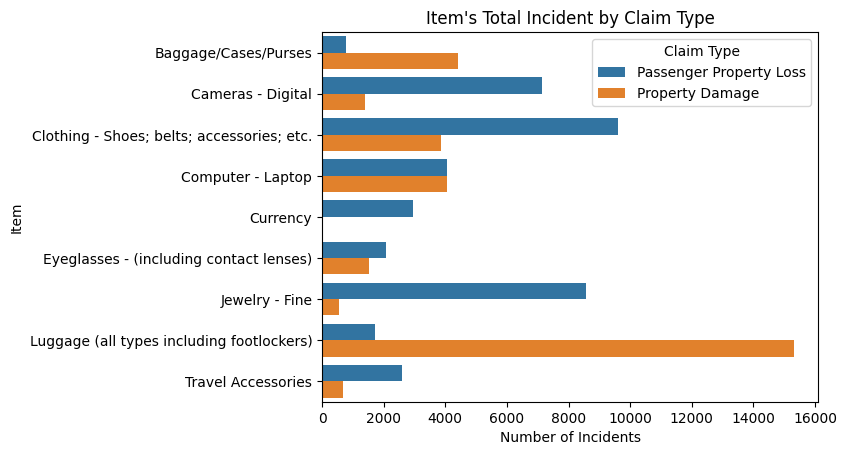

In [128]:
sns.barplot(data=data_item_by_claim_type.reset_index(), y='Item',x='Claim Number',hue='Claim Type').set(title="Item's Total Incident by Claim Type",xlabel='Number of Incidents')
plt.show()

Dari hasil visualisasi diatas, dapat disimpulkan bahwa:
- Koper merupakan barang yang paling sering mengalami kerusakan
- Baju merupakan barang yang paling sering hilang, dan diikuti oleh perhiasan

# Kesimpulan & Actionable

### Kesimpulan

Sesuai tujuan dari permasalahan yang sudah didefinisikan, perusahaan TSA ingin melihat karakteristik klaim yang sering terjadi terutama yang memakan biaya ganti rugi besar, beberapa temuan adalah sebagai berikut:
1. 10 Bandara dengan insiden terbanyak (1-10): Los Angeles International Airport, John F. Kennedy International, Chicago O'Hare International Airport, Newark International Airport, Orlando International Airport, Miami International Airport, Hartsfield-Jackson Atlanta International Airport, Seattle-Tacoma International, McCarran International, Phoenix Sky Harbor International
1. 10 Maskapai dengan insiden terbanyak (1-10): Delta Air Lines, Southwest Airlines, American Airlines, UAL, USAir, Continental Airlines, Northwest Airlines, Alaska Airlines, Jet Blue, AirTran Airlines
1. Tipe Klaim dengan insiden terbanyak : Kehilangan Barang dan Kerusakan Barang
1. Lokasi Klaim dengan insiden terbanyak : di checked baggage dan checkpoint
1. Disetiap bandara pada poin 1, lokasi checked baggage selalu memiliki jml insiden yang lebih banyak dibanding lokasi checkpoint
1. Laptop/Komputer & Perhiasan adalah barang dengan biaya ganti rugi tertinggi. Sedangkan Koper dan Pakaian adalah barang dengan insiden terbanyak.
1. Koper merupakan barang yang paling sering terjadi insiden kerusakan, sedangkan Pakaian merupakan barang yang paling sering hilang.

### Actionable

adapun hal yang perlu dilakukan oleh TSA untuk meminimalisir insiden agar biaya ganti rugi tidak berlebih adalah sebagai berikut:
1. TSA perlu memberikan <b>Surat Perintah</b> untuk lebih berhati-hati dalam memproses barang penumpang kepada 10 bandara pada poin 1 kesimpulan, khususnya di lokasi Checked Baggage dan Checkpoin
1. TSA perlu memberikan <b>Surat Perintah</b> untuk lebih berhati-hati dalam memproses barang penumpang kepada 10 maskapai pada poin 2 kesimpulan
1. TSA perlu memberikan regulasi baru agar <b>Perhiasan, Komputer/Laptop, Uang, Kamera, dan Kaca Mata</b> tidak boleh dimasukkan kedalam bagasi pesawat untuk meminimalisir kehilangan atau kerusakan barang akibat kelalaian petugas Bandara/Maskpai.
1. TSA perlu memberikan regulasi baru agar Koper/Tas perlu diperhatikan proses penyimpanannya agar meminimalisir insiden kerusakan barang
1. (Optionable) dengan adanya daftar Bandara dengan insiden terbanyak, TSA dapat menambahkan jumlah staff yang ditempatkan di lokasi Check Baggage/Checkpoint agar meningkatkan ke berhasilan peminimalisiran insiden.

tentunya, agar actionable diatas dapat berjalan dengan baik, TSA juga perlu memberikan <b>Surat Peringatan</b> kepada Bandara/Maskpai yang tidak menjalankan daftar actionable diatas. Khusus untuk poin terakhir, tentu TSA juga perlu memikirkan biaya yang akan dikeluarkan apabila ingin menambahkan staff ke 10 bandara tersebut. Berdasarkan hasil pencarian di internet, gaji staff bandara perbulan di Indonesia adalah 7 juta rupiah (463 dollar). Sehingga dengan asumsi gaji staff bandara AS sama dengan Indonesia, maka total biaya tambahan yang perlu di keluarkan per tahun apabila TSA ingin menambahkan <b>2 Staff Baru</b> adalah sebagai berikut

In [ ]:
one_month = 463
one_year = one_month * 12
cost_employee_per_year = (one_year*2)*10

print(f"Cost jika menambahkan 2 petugas di 10 bandara = {cost_employee_per_year} dolar per tahun")

Cost jika menambahkan 2 petugas di 10 bandara = 111120 dolar per tahun


Selanjutnya mari kita hitung rata-rata cost ganti rugi yang dikeluarkan di 10 bandara (LA Int Aiport, John F. Kenedy int Airport, etc.) per tahunnnya

#### Incident Average per Year at top 10 Airport

In [ ]:
df['Date Received'] = pd.to_datetime(df['Date Received'])
df['Year'] = df['Date Received'].dt.year
data_year = df[df['Airport Name'].isin(data_top10['index'].values)].groupby('Year')[['Claim Number']].count()

display(data_year)

print(f"Rata-rata jumlah insiden terjadi dalam 1 tahun = {round(data_year['Claim Number'].median())}")
print(f"Biaya ganti rugi yang dikeluarkan per tahun = {round(df['Close Amount'].mean() * data_year['Claim Number'].median())} dolar")

,Claim Number
Year,
2002,297
2003,5768
2004,8760
2005,7371
2006,5995
2007,6105
2008,5575
2009,4330
2010,3571


Rata-rata jumlah insiden terjadi dalam 1 tahun = 3950
Biaya ganti rugi yang dikeluarkan per tahun = 128132 dolar


In [ ]:
print(f"hemat {128132-111120} dolar per tahun")

hemat 17012 dolar per tahun


Maka apabila penambahan staff diberlakukan di 10 bandara tsb. dengan asumsi jumlah insiden di 10 bandara tsb bernilai 0 atau tidak ada insiden. Ganti rugi dapat berkurang sebesar 17012 dolar per tahun atau setara dengan +- 250 juta rupiah